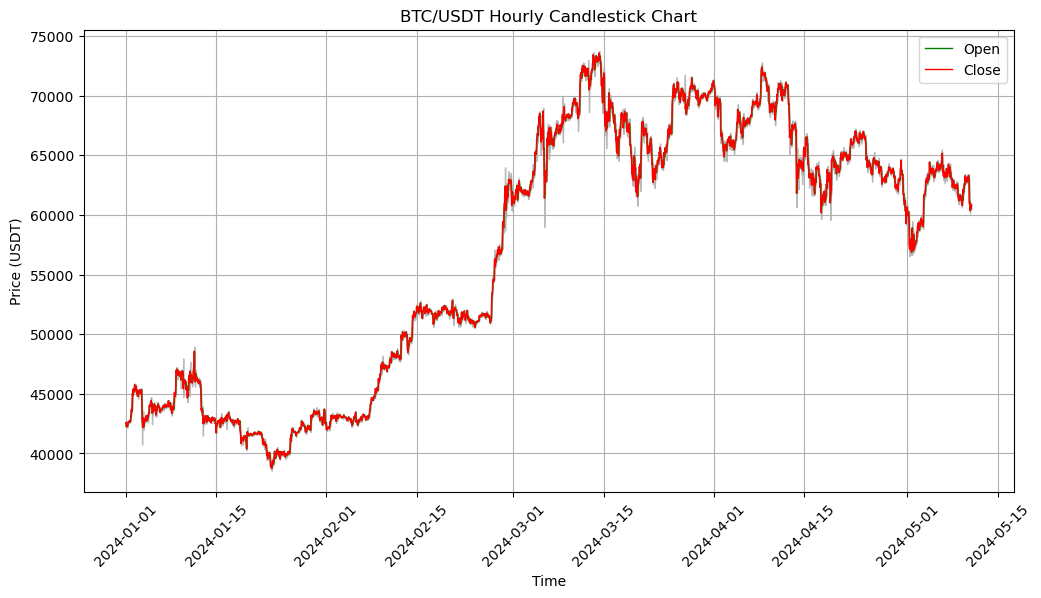

In [2]:
#BTC/USDT Hourly Candlestick Chart
import matplotlib.pyplot as plt
import pandas as pd

# Load trade data into a DataFrame
data = pd.read_csv("BTCUSDT_1h.csv")

# Convert timestamp to datetime
data['open_time'] = pd.to_datetime(data['open_time'], unit='ms')

# Plot candlestick chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data['open_time'], data['open'], color='green', label='Open', linewidth=1)
ax.plot(data['open_time'], data['close'], color='red', label='Close', linewidth=1)
ax.fill_between(data['open_time'], data['high'], data['low'], color='gray', alpha=0.5)
ax.set_title('BTC/USDT Hourly Candlestick Chart')
ax.set_xlabel('Time')
ax.set_ylabel('Price (USDT)')
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


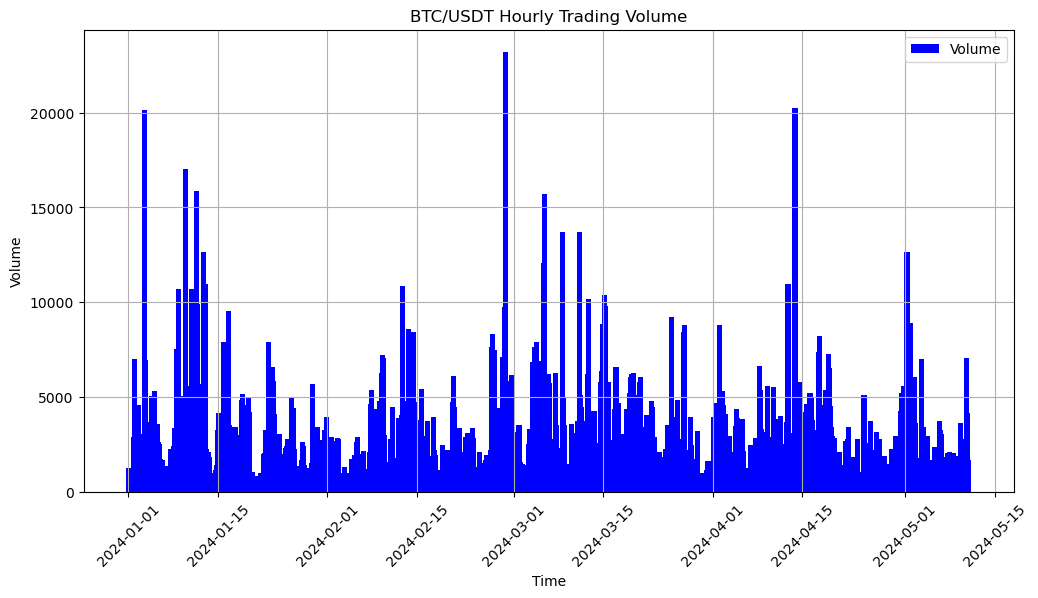

In [3]:
# Plot volume chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(data['open_time'], data['volume'], color='blue', label='Volume')
ax.set_title('BTC/USDT Hourly Trading Volume')
ax.set_xlabel('Time')
ax.set_ylabel('Volume')
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


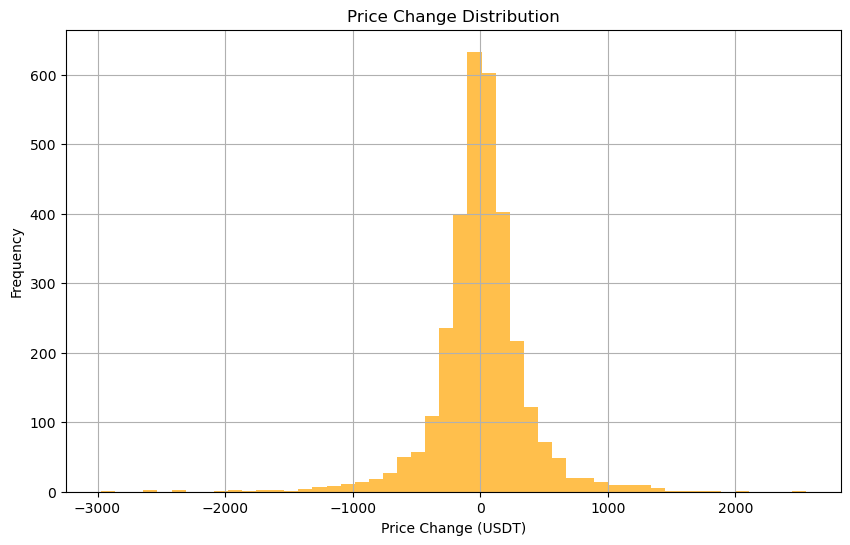

In [4]:
# Calculate price changes
data['price_change'] = data['close'] - data['open']

# Plot price change distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(data['price_change'], bins=50, color='orange', alpha=0.7)
ax.set_title('Price Change Distribution')
ax.set_xlabel('Price Change (USDT)')
ax.set_ylabel('Frequency')
plt.grid(True)
plt.show()


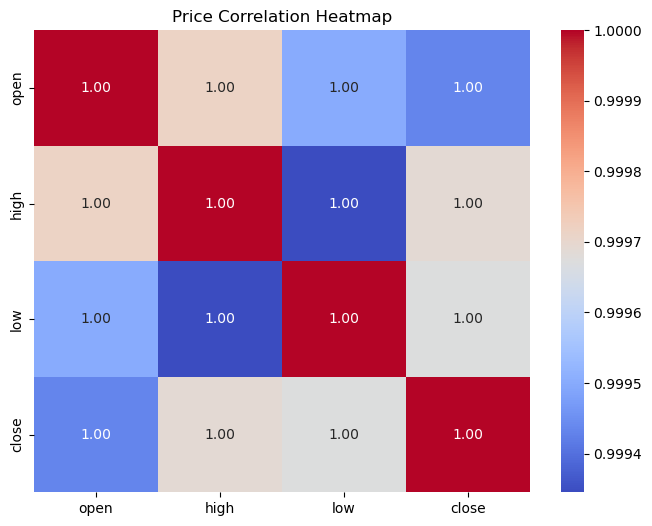

In [5]:
import seaborn as sns

# Generate correlation matrix
corr = data[['open', 'high', 'low', 'close']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Price Correlation Heatmap')
plt.show()


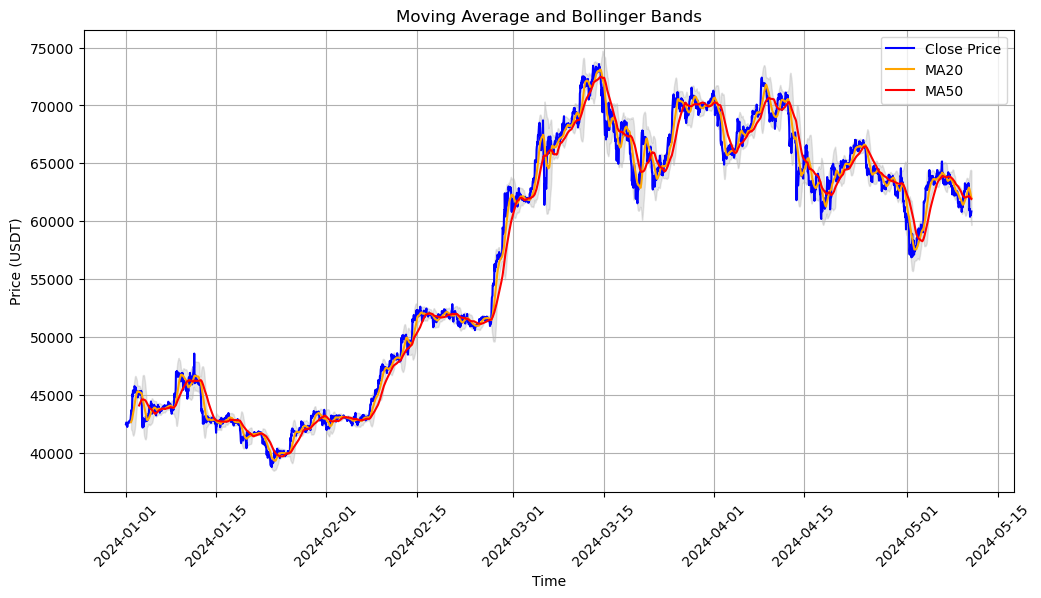

In [6]:
# Calculate moving averages
data['MA20'] = data['close'].rolling(window=20).mean()
data['MA50'] = data['close'].rolling(window=50).mean()

# Calculate Bollinger Bands
data['upper_band'], data['lower_band'] = data['MA20'] + 2 * data['close'].rolling(window=20).std(), data['MA20'] - 2 * data['close'].rolling(window=20).std()

# Plot moving average and Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['open_time'], data['close'], label='Close Price', color='blue')
plt.plot(data['open_time'], data['MA20'], label='MA20', color='orange')
plt.plot(data['open_time'], data['MA50'], label='MA50', color='red')
plt.fill_between(data['open_time'], data['upper_band'], data['lower_band'], color='gray', alpha=0.2)
plt.title('Moving Average and Bollinger Bands')
plt.xlabel('Time')
plt.ylabel('Price (USDT)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


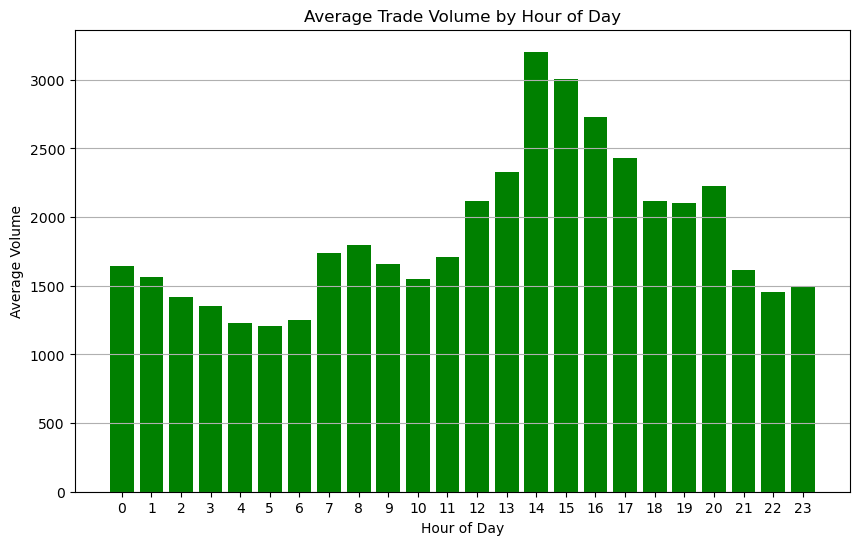

In [7]:
# Extract hour from timestamp
data['hour'] = data['open_time'].dt.hour

# Calculate average volume per hour
hourly_volume = data.groupby('hour')['volume'].mean()

# Plot trade volume by hour of day
plt.figure(figsize=(10, 6))
plt.bar(hourly_volume.index, hourly_volume.values, color='green')
plt.title('Average Trade Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Volume')
plt.xticks(hourly_volume.index)
plt.grid(axis='y')
plt.show()


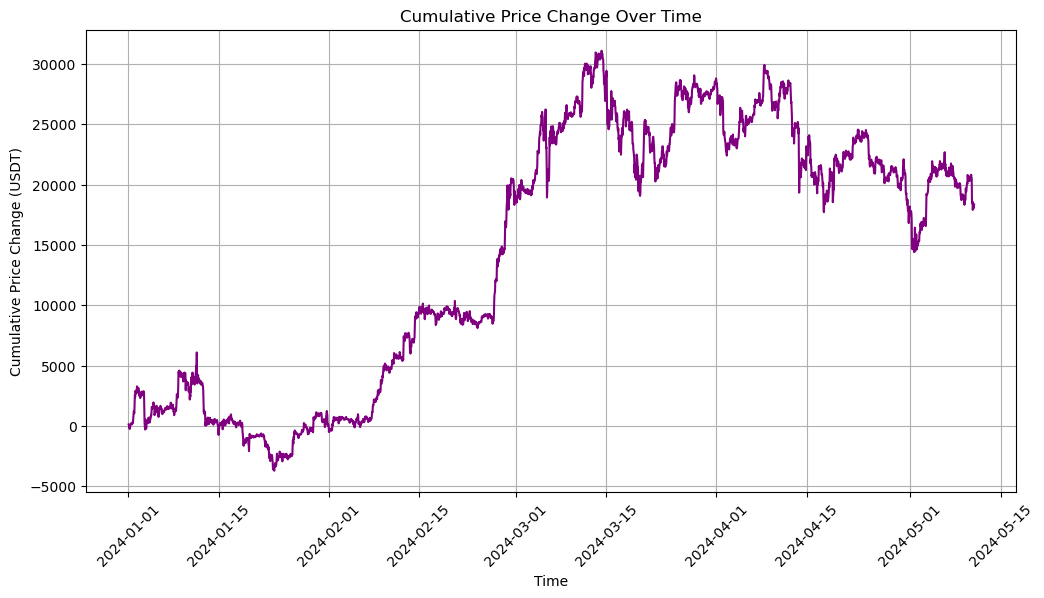

In [8]:
# Calculate cumulative price change
data['cumulative_price_change'] = data['close'].diff().cumsum()

# Plot cumulative price change over time
plt.figure(figsize=(12, 6))
plt.plot(data['open_time'], data['cumulative_price_change'], color='purple')
plt.title('Cumulative Price Change Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Price Change (USDT)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [10]:
import seaborn as sns

# Load data for different trading pairs
data_btc = pd.read_csv("BTCUSDT_1h.csv")
data_eth = pd.read_csv("ETHUSDT_1h.csv")

# Combine data
data_combined = pd.concat([data_btc['close'], data_eth['close']], axis=1)
data_combined.columns = ['BTCUSDT', 'ETHUSDT']

# Plot price distribution for different trading pairs
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_combined, palette='Set2')
plt.title('Price Distribution for BTC/USDT and ETH/USDT')
plt.ylabel('Closing Price (USDT)')
plt.xlabel('Trading Pair')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'ETHUSDT_1h.csv'